## <font color="blue">Taylor's Theorem and Taylor Series</font>

Taylor's theorem says that if $f(x)$ is $C^\infty$ near $x=a$ then for any $N=1,2,3,\dotsc$

\begin{align*}
  f(x)
& =
  P_{N-1}(x)
  +
  R_N(x),
\\
  P_{N-1}(x)
& =
  \sum_{n=0}^{N-1}
  \frac{f^{(n)}(a)}{n!}
  (x-a)^n,
\\
  R_N(x)
& =
  \frac{f^{(N)}\bigl(\theta{x}+(1-\theta)a)}{N!}(x-a)^N
\\
& =
  \frac{(x-a)^N}{(N-1)!}
  \int_0^1
  (1-t)^{N-1}
  f\bigl(tx+(1-t)a)
  dt,
\end{align*}

where $\theta=\theta(x,a,N)\in(0,1)$ is a constant depending on $x$, $a$ and $N$. For <font color=red><b>some</b></font> smooth function $f$ and <font color=red><b>some</b></font> $x$ we have 

$$
R_N(x) \rightarrow 0 \quad\text{as}\quad N\rightarrow\infty.
$$

In this case it is well-known that there exists $\rho\in(0,\infty]$ such that 

$$
f(x)=
\sum_{n=0}^\infty
\frac{f^{(n)}(a)}{n!}
(x-a)^n,
\quad
x\in(a-\rho,a+\rho).
$$

The right hand side of the above is said to be the Taylor series or the Taylor expansion of $f(x)$ at center $x=a$ with convergence radius $\rho$.

### <font color="deepskyblue">Examples of Taylor series #1</font>

\begin{align*}
  \log(1+x)
& =
  \sum_{n=1}^\infty\frac{(-1)^{n-1}x^n}{n},
  \quad
  x\in(-1,1], 
\\
  (1+x)^\alpha
& =
  \sum_{n=0}^\infty
  \begin{pmatrix}
  \alpha \\ n 
  \end{pmatrix}
  x^n 
  \quad
  (\alpha\in\mathbb{C}), 
  \quad
  x\in(-1,1), 
\\
  \begin{pmatrix}
  \alpha \\ n 
  \end{pmatrix}
& =
  \frac{\alpha(\alpha-1)\dotsb(\alpha-n+1)}{n!},
  \quad
  n=1,2,3,\dotsc,
  \qquad
  \begin{pmatrix}
  \alpha \\ 0 
  \end{pmatrix}
  =
  1,
  \\
  \operatorname{Arctan}{x}
& =\sum_{k=0}^\infty\frac{(-1)^kx^{2k+1}}{2k+1},
  \quad
  x\in[-1,1]. 
\end{align*}

### <font color="magenta">Observation #1</font>

$$
\log{x}
=
\sum_{n=1}^\infty\frac{(-1)^{n-1}x^n}{n},
\quad
x\in(-1,1]. 
$$

In [1]:
using Plots

In [2]:
x = range(-1, 1.2, length = 221);
N=30;

In [3]:
# log(1+x)
f1=log.(ones(221)+x);

# Taylor polynomials
s1=zeros(N,221);
for n=1:N
	for l=1:221
	    s1[n,l]=(-1)^(n-1)*x[l]^n/n;
	end
end

S1=zeros(N,221);
S1[1,:]=s1[1,:];
for l=1:221
	for n=2:N
		S1[n,l]=S1[n-1,l]+s1[n,l];
	end
end

┌ Info: Saved animation to 
│   fn = /home/hc/Dropbox/Julia/jupyter/taylor_log.gif
└ @ Plots /home/hc/.julia/packages/Plots/hxZ0l/src/animation.jl:114


Plots.AnimatedGif("/home/hc/Dropbox/Julia/jupyter/taylor_log.gif")
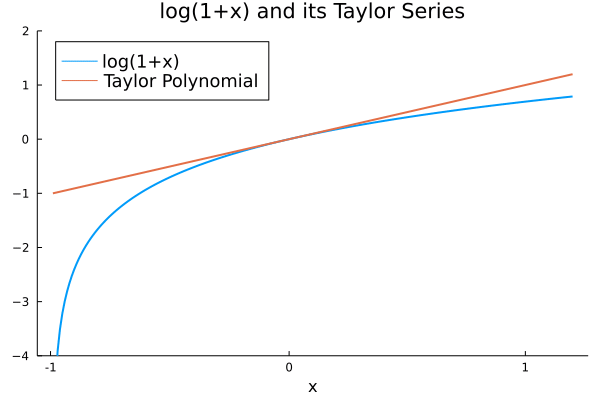

In [4]:
# animation
anim1 = @animate for n=1:N
    g1=S1[n,:];
    plot([f1,g1],grid=false,linewidth=2,ylim=(-4,2),
		title="log(1+x) and its Taylor Series",
		xticks = ([0 101 201;], [-1 0 1]),xlabel="x",
		label=["log(1+x)" "Taylor Polynomial"],legend=:topleft,legendfont=font(12))
end
gif(anim1, "taylor_log.gif", fps = 2)

### <font color="magenta">Observation #2</font>

$$
(1+x)^{-1/2}
=
\sum_{k=0}^\infty\frac{(-1)^k(2n)!x^n}{2^{2n}(n!)^2},
\quad
x\in(-1,1].
$$

In [5]:
# (1+x)^{-1/2}
f2=(ones(221)+x).^(-1/2);

# Taylor series
s2=zeros(N,221);
for n=1:N
	for l=1:221
	    s2[n,l]=(-1)^n*factorial(big(2*n))*x[l]^n/2^(2*n)/factorial(big(n))/factorial(big(n));
    end
end

S2=zeros(N,221);
S2[1,:]=ones(221)+s2[1,:];
for l=1:221
	for n=2:N
		S2[n,l]=S2[n-1,l]+s2[n,l];
	end
end

┌ Info: Saved animation to 
│   fn = /home/hc/Dropbox/Julia/jupyter/taylor_negative.gif
└ @ Plots /home/hc/.julia/packages/Plots/hxZ0l/src/animation.jl:114


Plots.AnimatedGif("/home/hc/Dropbox/Julia/jupyter/taylor_negative.gif")
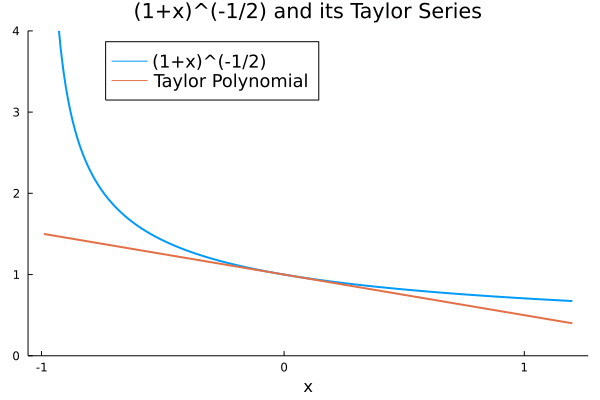

In [6]:
# animation
anim2 = @animate for n=1:N
    g2=S2[n,:];
    plot([f2,g2],grid=false,linewidth=2,ylim=(0,4),
		title="(1+x)^(-1/2) and its Taylor Series",
		xticks = ([0 101 201;], [-1 0 1]),xlabel="x",
		label=["(1+x)^(-1/2)" "Taylor Polynomial"],legend=:top,legendfont=font(12))
end
gif(anim2, "taylor_negative.gif", fps = 2)

### <font color="deepskyblue">Examples of Taylor series #2</font>

$$
e^x=\sum_{n=0}^\infty\frac{x^n}{n!},
\quad   
\cos{x}=\sum_{k=0}^\infty\frac{(-1)^kx^{2k}}{(2k)!},
\quad
\sin{x}=\sum_{k=0}^\infty\frac{(-1)^kx^{2k+1}}{(2k+1)!},
\quad
x\in\mathbb{R}.
$$

### <font color="magenta">Observation #3</font>

$$
\sin{x}=\sum_{k=0}^\infty\frac{(-1)^kx^{2k+1}}{(2k+1)!},
\quad
x\in\mathbb{R}.
$$

In [8]:
y = range(-3*pi, 3*pi, length = 301);
K=15;

In [9]:
# sin(y)
f3=sin.(y);

# Taylor polynomial
s3=zeros(K,301);
for k=1:K
	for l=1:301
	    s3[k,l]=(-1)^(k-1)*y[l]^(2*k-1)/factorial(big(2*k-1));
    end
end

S3=zeros(K,301);
S3[1,:]=s3[1,:];
for l=1:301
	for k=2:K
		S3[k,l]=S3[k-1,l]+s3[k,l];
	end
end

┌ Info: Saved animation to 
│   fn = /home/hc/Dropbox/Julia/jupyter/taylor_sin.gif
└ @ Plots /home/hc/.julia/packages/Plots/hxZ0l/src/animation.jl:114


Plots.AnimatedGif("/home/hc/Dropbox/Julia/jupyter/taylor_sin.gif")
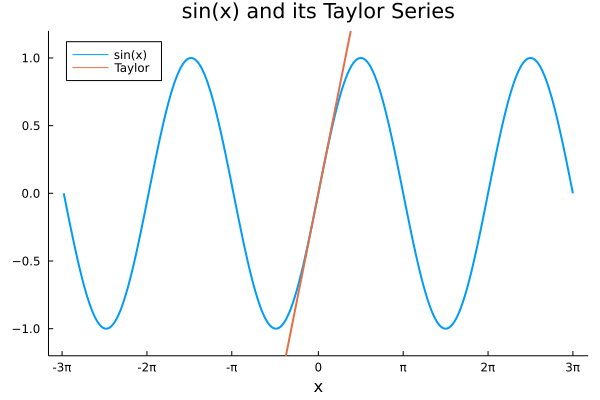

In [10]:
# animation
anim3 = @animate for k=1:K
    g3=S3[k,:];
    plot([f3,g3],grid=false,linewidth=2,ylim=(-1.2,1.2),
		title="sin(x) and its Taylor Series",
		xticks = ([0 50 100 151 201 251 301;], ["-3π" "-2π" "-π" "0" "π" "2π" "3π"]),xlabel="x",
		label=["sin(x)" "Taylor"],legend=:topleft,legendfont=font(8))
end
gif(anim3, "taylor_sin.gif", fps = 2)	